In [1]:
import pandas as pd

In [ ]:
# rewrite the following to create a pandas dataframe with the following columns:
#   'image' relative path to the image
#   'unicode' the corresponding unicode value

metadata = pd.read_csv("english.csv")
metadata["unicode"] = metadata["label"].apply(lambda x : "u{}".format(hex(ord(x))[2:]))
metadata

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


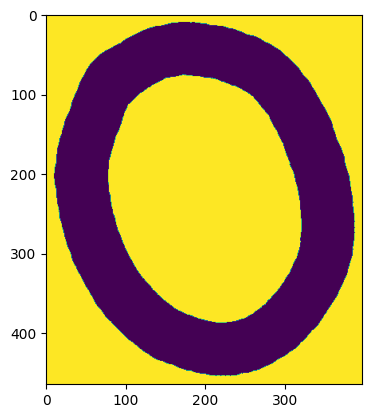

In [ ]:
def get_first_index(arr, x):
    for i, val in enumerate(arr):
        if val == x:
            return i


def finding_box(im):
    # function to get the character into a bounding box
    valid_rows = np.min(im, axis=0)
    valid_cols = np.min(im, axis=1)
    top = max(0, get_first_index(valid_rows, 0)-10)
    bottom = min(len(valid_rows) - get_first_index(reversed(valid_rows), 0) + 10, len(valid_rows))

    left = max(0, get_first_index(valid_cols, 0)-10)
    right = min(len(valid_cols) - get_first_index(reversed(valid_cols), 0) + 10, len(valid_cols))

    return im[left:right, top:bottom]


(64, 64)


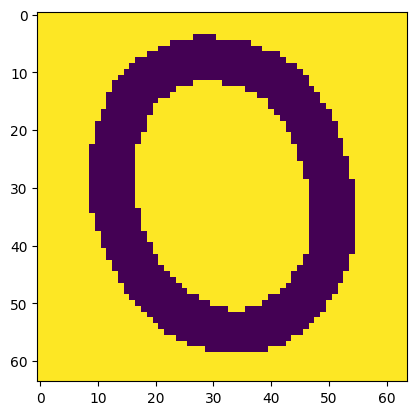

In [ ]:
from skimage import measure


def downsample_and_binarise(im, target_size=64):
    # function to downsample image to be of size exactly (64, 64)
    max_dim = int(np.ceil(max(im.shape)/target_size))*target_size

    height_diff = max_dim - im.shape[0]

    width_diff = max_dim - im.shape[1]

    pad_info = []

    half_diff = height_diff // 2
    right_pad = half_diff if height_diff % 2 == 0 else half_diff + 1
    pad_info.append((half_diff, right_pad))

    half_diff = width_diff // 2
    bottom_pad = half_diff if width_diff % 2 == 0 else half_diff + 1
    pad_info.append((half_diff, bottom_pad))

    im = np.pad(im, pad_info, constant_values=255)

    dim = measure.block_reduce(im, int(np.ceil(max_dim/target_size)))

    # block reduce change scale of values, so move it back to 8-bit
    dim = (255 * (dim / np.max(dim))).astype("uint8")

    dim = np.where(dim < target_size, 0, 255).astype("uint8")

    if dim.shape != (target_size, target_size):
        pad_amount = target_size - dim.shape[0]
        dim = np.pad(dim, (0, pad_amount), constant_values=255)

    return dim



In [ ]:
import os
import time
import datetime

def save_image(im, unicode, relative_dir="./"):
    # saves image with correct unicode formatting
    # change relative directory to store processed images where you want
    existing_images = os.listdir("Img2/")
    
    im_id = int(time.time() * 1000)

    filename = f"Img2/{unicode}-{im_id}.png"

    while filename in existing_images:
        im_id = int(time.time() * 1000)

        filename = f"{relative_dir}/{unicode}-{im_id}.png"


    im = Image.fromarray(im)
    im.save(filename)


In [ ]:
# this cell processes the images and saves them

total_size = len(metadata)

for i, row in metadata.iterrows():
    if i % (total_size//100) == 0:
        print(f"{i} out of {total_size} complete")
        
    raw_im = np.asarray(Image.open(row["image"]).convert("L"))
    bounded_img = finding_box(raw_im)
    downsample_image = downsample_and_binarise(bounded_img)
    assert downsample_image.shape == (64, 64)
    save_image(downsample_image, row["unicode"])

0 out of 3410 complete
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
34 out of 3410 complete
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
68 out of 3410 complete
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
102 out of 